In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.DataFrame(np.random.randint(20,30 , size=(500,5)) , columns=("Comp","Phy","Math","Eng","Urdu"))
df2 = pd.DataFrame(np.random.randint(30,70 , size=(500,5)) , columns=("Comp","Phy","Math","Eng","Urdu"))
df3 = pd.DataFrame(np.random.randint(70,100 , size=(500,5)) , columns=("Comp","Phy","Math","Eng","Urdu"))

In [3]:
df = pd.concat([df1,df2,df3])

In [4]:
df.head(3)

,Comp,Phy,Math,Eng,Urdu
0,22,24,23,29,28
1,29,22,24,28,20
2,23,21,21,22,24


In [5]:
del df1 , df2 ,df3

In [6]:
df["Obtained_Marks"] = df.Comp+df.Phy+df.Math+df.Eng+df.Urdu

In [7]:
df["Percentage"] = df.Obtained_Marks/500*100

In [8]:
df.head()

,Comp,Phy,Math,Eng,Urdu,Obtained_Marks,Percentage
0,22,24,23,29,28,126,25.2
1,29,22,24,28,20,123,24.6
2,23,21,21,22,24,111,22.2
3,22,22,27,27,27,125,25.0
4,27,23,25,20,29,124,24.8


In [9]:
def grade(x):
    if x >= 90: return "A+"
    elif x>=80: return "A"
    elif x>=70: return "B"
    elif x>=60: return "C"
    elif x>=50: return "D"
    else:return "F"
                

In [10]:
df["Grade"] = df.Percentage.apply(grade)

In [11]:
df.Grade.value_counts()

F     765
A     390
D     222
B      73
A+     37
C      13
Name: Grade, dtype: int64

In [12]:
df = df.sample(frac=1)

In [13]:
X = df[["Comp","Phy","Math","Eng","Urdu"]]

In [14]:
X.head(2)

,Comp,Phy,Math,Eng,Urdu
285,98,85,89,70,97
444,52,31,51,52,48


In [15]:
Y = df[["Grade"]]

In [16]:
Y.drop_duplicates()

,Grade
285,A
444,F
207,B
261,D
71,A+
193,C


In [17]:
y = Y.sort_values(by=['Grade'])

In [18]:
y

,Grade
285,A
122,A
490,A
204,A
105,A
...,...
113,F
466,F
97,F
487,F


<AxesSubplot:>

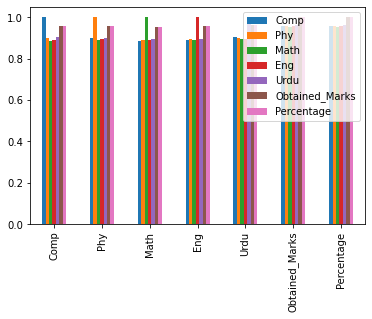

In [19]:
df.corr().plot(kind="bar")

In [20]:
Y = pd.get_dummies(Y)

In [21]:
Y

,Grade_A,Grade_A+,Grade_B,Grade_C,Grade_D,Grade_F
285,1,0,0,0,0,0
444,0,0,0,0,0,1
124,0,0,0,0,0,1
5,0,0,0,0,0,1
207,0,0,1,0,0,0
...,...,...,...,...,...,...
489,1,0,0,0,0,0
158,1,0,0,0,0,0
406,1,0,0,0,0,0
118,0,0,1,0,0,0


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD , Adam

In [23]:
model = Sequential()
model.add(Dense(32 , activation="relu" , input_shape=(5,)))
model.add(Dense(16 , activation="relu"  ))
model.add(Dense(6 , activation="softmax" ))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
Total params: 822
Trainable params: 822
Non-trainable params: 0
_________________________________________________________________


In [25]:
Y

,Grade_A,Grade_A+,Grade_B,Grade_C,Grade_D,Grade_F
285,1,0,0,0,0,0
444,0,0,0,0,0,1
124,0,0,0,0,0,1
5,0,0,0,0,0,1
207,0,0,1,0,0,0
...,...,...,...,...,...,...
489,1,0,0,0,0,0
158,1,0,0,0,0,0
406,1,0,0,0,0,0
118,0,0,1,0,0,0


In [26]:

model.compile(optimizer=SGD(lr=0.002),
             loss='categorical_crossentropy',
             metrics=['acc'])

In [27]:
#Trian Model
model.fit(X, Y, epochs=1000)

Epoch 1/1000
47/47 [==============================] - 2s 2ms/step - loss: 6.8110 - acc: 0.2800
Epoch 2/1000
47/47 [==============================] - 0s 963us/step - loss: 1.5610 - acc: 0.3610
Epoch 3/1000
47/47 [==============================] - 0s 868us/step - loss: 1.4058 - acc: 0.3711
Epoch 4/1000
47/47 [==============================] - 0s 715us/step - loss: 1.4086 - acc: 0.3844
Epoch 5/1000
47/47 [==============================] - 0s 737us/step - loss: 1.3957 - acc: 0.4134
Epoch 6/1000
47/47 [==============================] - 0s 802us/step - loss: 1.3774 - acc: 0.4284
Epoch 7/1000
47/47 [==============================] - 0s 715us/step - loss: 1.4179 - acc: 0.4770
Epoch 8/1000
47/47 [==============================] - 0s 715us/step - loss: 1.3625 - acc: 0.4975
Epoch 9/1000
47/47 [==============================] - 0s 715us/step - loss: 1.3927 - acc: 0.5740
Epoch 10/1000
47/47 [==============================] - 0s 824us/step - loss: 1.3715 - acc: 0.5759
Epoch 11/1000
47/47 [==========

47/47 [==============================] - 0s 715us/step - loss: 0.9583 - acc: 0.7580
Epoch 85/1000
47/47 [==============================] - 0s 824us/step - loss: 0.9335 - acc: 0.7646
Epoch 86/1000
47/47 [==============================] - 0s 650us/step - loss: 0.9413 - acc: 0.7626
Epoch 87/1000
47/47 [==============================] - 0s 672us/step - loss: 0.9372 - acc: 0.7629
Epoch 88/1000
47/47 [==============================] - 0s 672us/step - loss: 0.8953 - acc: 0.7938
Epoch 89/1000
47/47 [==============================] - 0s 737us/step - loss: 0.8985 - acc: 0.7831
Epoch 90/1000
47/47 [==============================] - 0s 759us/step - loss: 0.9417 - acc: 0.7630
Epoch 91/1000
47/47 [==============================] - 0s 715us/step - loss: 0.9062 - acc: 0.7655
Epoch 92/1000
47/47 [==============================] - 0s 694us/step - loss: 0.9681 - acc: 0.7538
Epoch 93/1000
47/47 [==============================] - 0s 715us/step - loss: 0.9364 - acc: 0.7506
Epoch 94/1000
47/47 [=============

47/47 [==============================] - 0s 781us/step - loss: 0.7664 - acc: 0.7916
Epoch 168/1000
47/47 [==============================] - 0s 759us/step - loss: 0.7289 - acc: 0.7976
Epoch 169/1000
47/47 [==============================] - 0s 715us/step - loss: 0.7334 - acc: 0.7921
Epoch 170/1000
47/47 [==============================] - 0s 694us/step - loss: 0.7521 - acc: 0.7751
Epoch 171/1000
47/47 [==============================] - 0s 759us/step - loss: 0.7256 - acc: 0.7921
Epoch 172/1000
47/47 [==============================] - 0s 694us/step - loss: 0.7338 - acc: 0.7946
Epoch 173/1000
47/47 [==============================] - 0s 694us/step - loss: 0.7311 - acc: 0.7819
Epoch 174/1000
47/47 [==============================] - 0s 672us/step - loss: 0.7368 - acc: 0.7928
Epoch 175/1000
47/47 [==============================] - 0s 650us/step - loss: 0.7176 - acc: 0.7839
Epoch 176/1000
47/47 [==============================] - 0s 694us/step - loss: 0.7136 - acc: 0.7921
Epoch 177/1000
47/47 [===

47/47 [==============================] - 0s 846us/step - loss: 0.6019 - acc: 0.8228
Epoch 250/1000
47/47 [==============================] - 0s 911us/step - loss: 0.6340 - acc: 0.7980
Epoch 251/1000
47/47 [==============================] - 0s 694us/step - loss: 0.6021 - acc: 0.8144
Epoch 252/1000
47/47 [==============================] - 0s 715us/step - loss: 0.5901 - acc: 0.8287
Epoch 253/1000
47/47 [==============================] - 0s 694us/step - loss: 0.5765 - acc: 0.8332
Epoch 254/1000
47/47 [==============================] - 0s 715us/step - loss: 0.5897 - acc: 0.8250
Epoch 255/1000
47/47 [==============================] - 0s 715us/step - loss: 0.5884 - acc: 0.8253
Epoch 256/1000
47/47 [==============================] - 0s 715us/step - loss: 0.6321 - acc: 0.7989
Epoch 257/1000
47/47 [==============================] - 0s 715us/step - loss: 0.6009 - acc: 0.8061
Epoch 258/1000
47/47 [==============================] - 0s 694us/step - loss: 0.6190 - acc: 0.8118
Epoch 259/1000
47/47 [===

47/47 [==============================] - 0s 932us/step - loss: 0.5109 - acc: 0.8304
Epoch 332/1000
47/47 [==============================] - 0s 715us/step - loss: 0.5493 - acc: 0.8121
Epoch 333/1000
47/47 [==============================] - 0s 759us/step - loss: 0.5105 - acc: 0.8348
Epoch 334/1000
47/47 [==============================] - 0s 715us/step - loss: 0.5143 - acc: 0.8415
Epoch 335/1000
47/47 [==============================] - 0s 759us/step - loss: 0.5160 - acc: 0.8244
Epoch 336/1000
47/47 [==============================] - 0s 737us/step - loss: 0.5229 - acc: 0.8320
Epoch 337/1000
47/47 [==============================] - 0s 715us/step - loss: 0.5092 - acc: 0.8356
Epoch 338/1000
47/47 [==============================] - 0s 672us/step - loss: 0.4904 - acc: 0.8395
Epoch 339/1000
47/47 [==============================] - 0s 715us/step - loss: 0.5334 - acc: 0.8246
Epoch 340/1000
47/47 [==============================] - 0s 737us/step - loss: 0.4996 - acc: 0.8402
Epoch 341/1000
47/47 [===

47/47 [==============================] - 0s 781us/step - loss: 0.4693 - acc: 0.8356
Epoch 414/1000
47/47 [==============================] - 0s 759us/step - loss: 0.4903 - acc: 0.8322
Epoch 415/1000
47/47 [==============================] - 0s 737us/step - loss: 0.4595 - acc: 0.8411
Epoch 416/1000
47/47 [==============================] - 0s 759us/step - loss: 0.4889 - acc: 0.8188
Epoch 417/1000
47/47 [==============================] - 0s 715us/step - loss: 0.4500 - acc: 0.8392
Epoch 418/1000
47/47 [==============================] - 0s 694us/step - loss: 0.5059 - acc: 0.8305
Epoch 419/1000
47/47 [==============================] - 0s 715us/step - loss: 0.4824 - acc: 0.8362
Epoch 420/1000
47/47 [==============================] - 0s 694us/step - loss: 0.4916 - acc: 0.8276
Epoch 421/1000
47/47 [==============================] - 0s 759us/step - loss: 0.4742 - acc: 0.8338
Epoch 422/1000
47/47 [==============================] - 0s 694us/step - loss: 0.4818 - acc: 0.8309
Epoch 423/1000
47/47 [===

47/47 [==============================] - 0s 694us/step - loss: 0.4118 - acc: 0.8507
Epoch 496/1000
47/47 [==============================] - 0s 867us/step - loss: 0.4482 - acc: 0.8395
Epoch 497/1000
47/47 [==============================] - 0s 672us/step - loss: 0.4437 - acc: 0.8403
Epoch 498/1000
47/47 [==============================] - 0s 715us/step - loss: 0.4585 - acc: 0.8305
Epoch 499/1000
47/47 [==============================] - 0s 715us/step - loss: 0.4607 - acc: 0.8254
Epoch 500/1000
47/47 [==============================] - 0s 715us/step - loss: 0.4288 - acc: 0.8563
Epoch 501/1000
47/47 [==============================] - 0s 715us/step - loss: 0.4435 - acc: 0.8306
Epoch 502/1000
47/47 [==============================] - 0s 694us/step - loss: 0.4612 - acc: 0.8215
Epoch 503/1000
47/47 [==============================] - 0s 694us/step - loss: 0.4246 - acc: 0.8637
Epoch 504/1000
47/47 [==============================] - 0s 694us/step - loss: 0.4305 - acc: 0.8484
Epoch 505/1000
47/47 [===

47/47 [==============================] - 0s 694us/step - loss: 0.4012 - acc: 0.8569
Epoch 578/1000
47/47 [==============================] - 0s 781us/step - loss: 0.4201 - acc: 0.8516
Epoch 579/1000
47/47 [==============================] - 0s 715us/step - loss: 0.4079 - acc: 0.8579
Epoch 580/1000
47/47 [==============================] - 0s 737us/step - loss: 0.4314 - acc: 0.8424
Epoch 581/1000
47/47 [==============================] - 0s 715us/step - loss: 0.4219 - acc: 0.8502
Epoch 582/1000
47/47 [==============================] - 0s 759us/step - loss: 0.4350 - acc: 0.8406
Epoch 583/1000
47/47 [==============================] - 0s 694us/step - loss: 0.4245 - acc: 0.8523
Epoch 584/1000
47/47 [==============================] - 0s 781us/step - loss: 0.4095 - acc: 0.8457
Epoch 585/1000
47/47 [==============================] - 0s 694us/step - loss: 0.4076 - acc: 0.8529
Epoch 586/1000
47/47 [==============================] - 0s 737us/step - loss: 0.4511 - acc: 0.8349
Epoch 587/1000
47/47 [===

Epoch 660/1000
47/47 [==============================] - 0s 867us/step - loss: 0.4336 - acc: 0.8408
Epoch 661/1000
47/47 [==============================] - 0s 694us/step - loss: 0.4072 - acc: 0.8568
Epoch 662/1000
47/47 [==============================] - 0s 694us/step - loss: 0.4174 - acc: 0.8461
Epoch 663/1000
47/47 [==============================] - 0s 715us/step - loss: 0.4143 - acc: 0.8468
Epoch 664/1000
47/47 [==============================] - 0s 759us/step - loss: 0.3942 - acc: 0.8473
Epoch 665/1000
47/47 [==============================] - 0s 631us/step - loss: 0.4131 - acc: 0.8480
Epoch 666/1000
47/47 [==============================] - 0s 715us/step - loss: 0.4106 - acc: 0.8455
Epoch 667/1000
47/47 [==============================] - 0s 694us/step - loss: 0.4066 - acc: 0.8519
Epoch 668/1000
47/47 [==============================] - 0s 694us/step - loss: 0.3954 - acc: 0.8533
Epoch 669/1000
47/47 [==============================] - 0s 737us/step - loss: 0.3999 - acc: 0.8438
Epoch 670/

47/47 [==============================] - 0s 737us/step - loss: 0.3822 - acc: 0.8551
Epoch 743/1000
47/47 [==============================] - 0s 715us/step - loss: 0.3663 - acc: 0.8580
Epoch 744/1000
47/47 [==============================] - 0s 650us/step - loss: 0.3791 - acc: 0.8634
Epoch 745/1000
47/47 [==============================] - 0s 737us/step - loss: 0.3752 - acc: 0.8640
Epoch 746/1000
47/47 [==============================] - 0s 672us/step - loss: 0.3963 - acc: 0.8475
Epoch 747/1000
47/47 [==============================] - 0s 715us/step - loss: 0.3823 - acc: 0.8599
Epoch 748/1000
47/47 [==============================] - 0s 694us/step - loss: 0.4014 - acc: 0.8488
Epoch 749/1000
47/47 [==============================] - 0s 715us/step - loss: 0.3658 - acc: 0.8620
Epoch 750/1000
47/47 [==============================] - 0s 715us/step - loss: 0.4183 - acc: 0.8474
Epoch 751/1000
47/47 [==============================] - 0s 694us/step - loss: 0.4188 - acc: 0.8463
Epoch 752/1000
47/47 [===

47/47 [==============================] - 0s 715us/step - loss: 0.3954 - acc: 0.8448
Epoch 825/1000
47/47 [==============================] - 0s 737us/step - loss: 0.3787 - acc: 0.8548
Epoch 826/1000
47/47 [==============================] - 0s 737us/step - loss: 0.3839 - acc: 0.8477
Epoch 827/1000
47/47 [==============================] - 0s 694us/step - loss: 0.3809 - acc: 0.8558
Epoch 828/1000
47/47 [==============================] - 0s 715us/step - loss: 0.3651 - acc: 0.8663
Epoch 829/1000
47/47 [==============================] - 0s 715us/step - loss: 0.3924 - acc: 0.8392
Epoch 830/1000
47/47 [==============================] - 0s 694us/step - loss: 0.3994 - acc: 0.8409
Epoch 831/1000
47/47 [==============================] - 0s 737us/step - loss: 0.4011 - acc: 0.8392
Epoch 832/1000
47/47 [==============================] - 0s 672us/step - loss: 0.3867 - acc: 0.8661
Epoch 833/1000
47/47 [==============================] - 0s 715us/step - loss: 0.3697 - acc: 0.8616
Epoch 834/1000
47/47 [===

47/47 [==============================] - 0s 781us/step - loss: 0.3535 - acc: 0.8661
Epoch 907/1000
47/47 [==============================] - 0s 715us/step - loss: 0.3661 - acc: 0.8515
Epoch 908/1000
47/47 [==============================] - 0s 694us/step - loss: 0.3251 - acc: 0.8797
Epoch 909/1000
47/47 [==============================] - 0s 710us/step - loss: 0.3942 - acc: 0.8249
Epoch 910/1000
47/47 [==============================] - 0s 694us/step - loss: 0.3510 - acc: 0.8714
Epoch 911/1000
47/47 [==============================] - 0s 715us/step - loss: 0.3437 - acc: 0.8727
Epoch 912/1000
47/47 [==============================] - 0s 781us/step - loss: 0.3475 - acc: 0.8718
Epoch 913/1000
47/47 [==============================] - 0s 737us/step - loss: 0.3600 - acc: 0.8673
Epoch 914/1000
47/47 [==============================] - 0s 693us/step - loss: 0.3494 - acc: 0.8654
Epoch 915/1000
47/47 [==============================] - 0s 737us/step - loss: 0.3573 - acc: 0.8566
Epoch 916/1000
47/47 [===

Epoch 989/1000
47/47 [==============================] - 0s 715us/step - loss: 0.3496 - acc: 0.8575
Epoch 990/1000
47/47 [==============================] - 0s 694us/step - loss: 0.3695 - acc: 0.8492
Epoch 991/1000
47/47 [==============================] - 0s 694us/step - loss: 0.3450 - acc: 0.8682
Epoch 992/1000
47/47 [==============================] - 0s 715us/step - loss: 0.3651 - acc: 0.8541
Epoch 993/1000
47/47 [==============================] - 0s 672us/step - loss: 0.3636 - acc: 0.8438
Epoch 994/1000
47/47 [==============================] - 0s 694us/step - loss: 0.3633 - acc: 0.8648
Epoch 995/1000
47/47 [==============================] - 0s 694us/step - loss: 0.3418 - acc: 0.8704
Epoch 996/1000
47/47 [==============================] - 0s 650us/step - loss: 0.3536 - acc: 0.8708
Epoch 997/1000
47/47 [==============================] - 0s 694us/step - loss: 0.3428 - acc: 0.8680
Epoch 998/1000
47/47 [==============================] - 0s 694us/step - loss: 0.3409 - acc: 0.8737
Epoch 999/

In [28]:
df1 = pd.DataFrame(np.random.randint(20,30 , size=(500,5)) , columns=("Comp","Phy","Math","Eng","Urdu"))
df2 = pd.DataFrame(np.random.randint(30,70 , size=(500,5)) , columns=("Comp","Phy","Math","Eng","Urdu"))
df3 = pd.DataFrame(np.random.randint(70,100 , size=(500,5)) , columns=("Comp","Phy","Math","Eng","Urdu"))


In [29]:
df_test = pd.concat([df1,df2,df3])
df_test

,Comp,Phy,Math,Eng,Urdu
0,23,26,23,24,25
1,27,24,25,21,27
2,25,20,26,28,20
3,21,29,22,28,27
4,22,20,20,23,24
...,...,...,...,...,...
495,73,77,87,78,89
496,90,99,96,99,92
497,78,70,87,70,97
498,80,90,81,85,70


In [30]:
#Pridict the Grade
df_test["Grade"]  = Y.columns.take(np.argmax(model.predict(df.loc[: , "Comp":"Urdu"]) ,axis=1))

In [33]:
df_test.head()

,Comp,Phy,Math,Eng,Urdu,Grade
0,23,26,23,24,25,Grade_A
1,27,24,25,21,27,Grade_D
2,25,20,26,28,20,Grade_F
3,21,29,22,28,27,Grade_F
4,22,20,20,23,24,Grade_A


In [87]:
df.groupby("Grade").count()

,Comp,Phy,Math,Eng,Urdu,Obtained_Marks,Percentage
Grade,,,,,,,
A,390,390,390,390,390,390,390
A+,37,37,37,37,37,37,37
B,73,73,73,73,73,73,73
C,13,13,13,13,13,13,13
D,222,222,222,222,222,222,222
F,765,765,765,765,765,765,765


In [92]:
df_test.groupby("Grade").count()

,Comp,Phy,Math,Eng,Urdu
Grade,,,,,
Grade_A,512,512,512,512,512
Grade_A+,6,6,6,6,6
Grade_D,213,213,213,213,213
Grade_F,769,769,769,769,769


In [96]:
#Convert Data into XLSX file
df.to_excel("TrainData.xlsx" , index=False)
#Convert Data into XLSX file
df_test.to_excel("TestData.xlsx" , index=False)